In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import string 

from wordcloud import STOPWORDS


In [4]:
data = pd.read_csv('train.csv')
train_df = pd.DataFrame(data)
test = pd.read_csv('test.csv')
test_df = pd.DataFrame(test)

In [5]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [9]:
train_df[train_df["target"] == 1]["text"].values[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [10]:
train_df.loc[train_df['text'].str.contains('fire', na=False, case=False)]

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
...,...,...,...,...,...
7427,10625,wounded,NaN,Officer wounded suspect killed in exchange of ...,1
7433,10631,wounded,Yogya Berhati Nyaman,@wocowae Officer Wounded Suspect Killed in Exc...,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1


In [11]:
# word_count
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
test_df['word_count'] = test_df['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train_df['unique_word_count'] = train_df['text'].apply(lambda x: len(set(str(x).split())))
test_df['unique_word_count'] = test_df['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train_df['stop_word_count'] = train_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test_df['stop_word_count'] = test_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
train_df['url_count'] = train_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test_df['url_count'] = test_df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train_df['mean_word_length'] = train_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_df['mean_word_length'] = test_df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train_df['char_count'] = train_df['text'].apply(lambda x: len(str(x)))
test_df['char_count'] = test_df['text'].apply(lambda x: len(str(x)))

# punctuation_count
train_df['punctuation_count'] = train_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test_df['punctuation_count'] = test_df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
train_df['hashtag_count'] = train_df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test_df['hashtag_count'] = test_df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train_df['mention_count'] = train_df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test_df['mention_count'] = test_df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [12]:
train_df.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,3,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8,1,0,7.125000,65,2,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,0,4.500000,88,2,2,0


In [32]:
test_df.head()

,id,keyword,location,text,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,0,no_keyword,no_location,Just happened a terrible car crash,6,6,2,0,4.833333,34,0,0,0
1,2,no_keyword,no_location,"Heard about #earthquake is different cities, s...",9,9,2,0,6.222222,64,3,1,0
2,3,no_keyword,no_location,"there is a forest fire at spot pond, geese are...",19,19,10,0,4.105263,96,2,0,0
3,9,no_keyword,no_location,Apocalypse lighting. #Spokane #wildfires,4,4,0,0,9.250000,40,3,2,0
4,11,no_keyword,no_location,Typhoon Soudelor kills 28 in China and Taiwan,8,8,2,0,4.750000,45,0,0,0


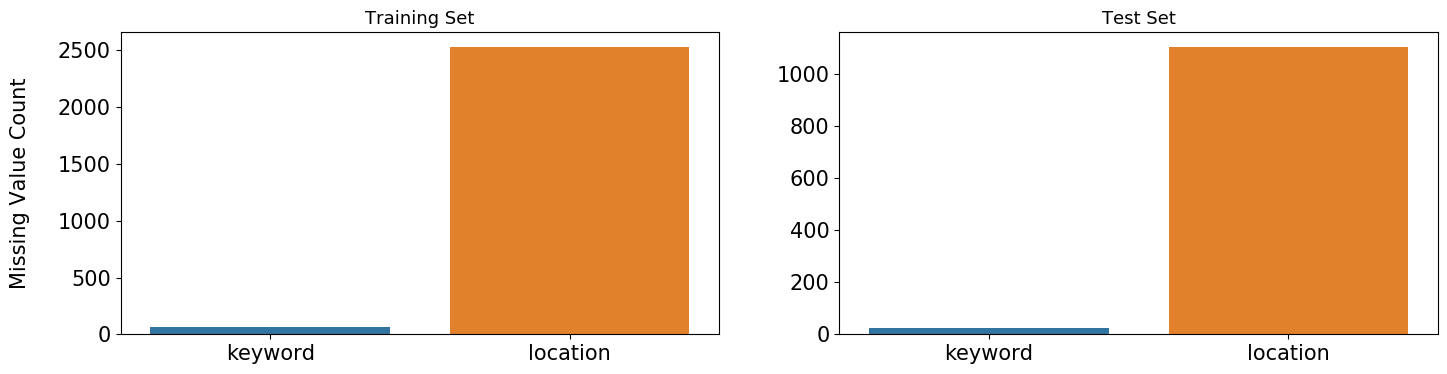

In [15]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train_df[missing_cols].isnull().sum().index, y=train_df[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test_df[missing_cols].isnull().sum().index, y=test_df[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [train_df, test_df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')


In [16]:
print(f'Number of unique values in keyword = {train_df["keyword"].nunique()} (Training) - {test_df["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {train_df["location"].nunique()} (Training) - {test_df["location"].nunique()} (Test)')

Number of unique values in keyword = 222 (Training) - 222 (Test)
Number of unique values in location = 3342 (Training) - 1603 (Test)


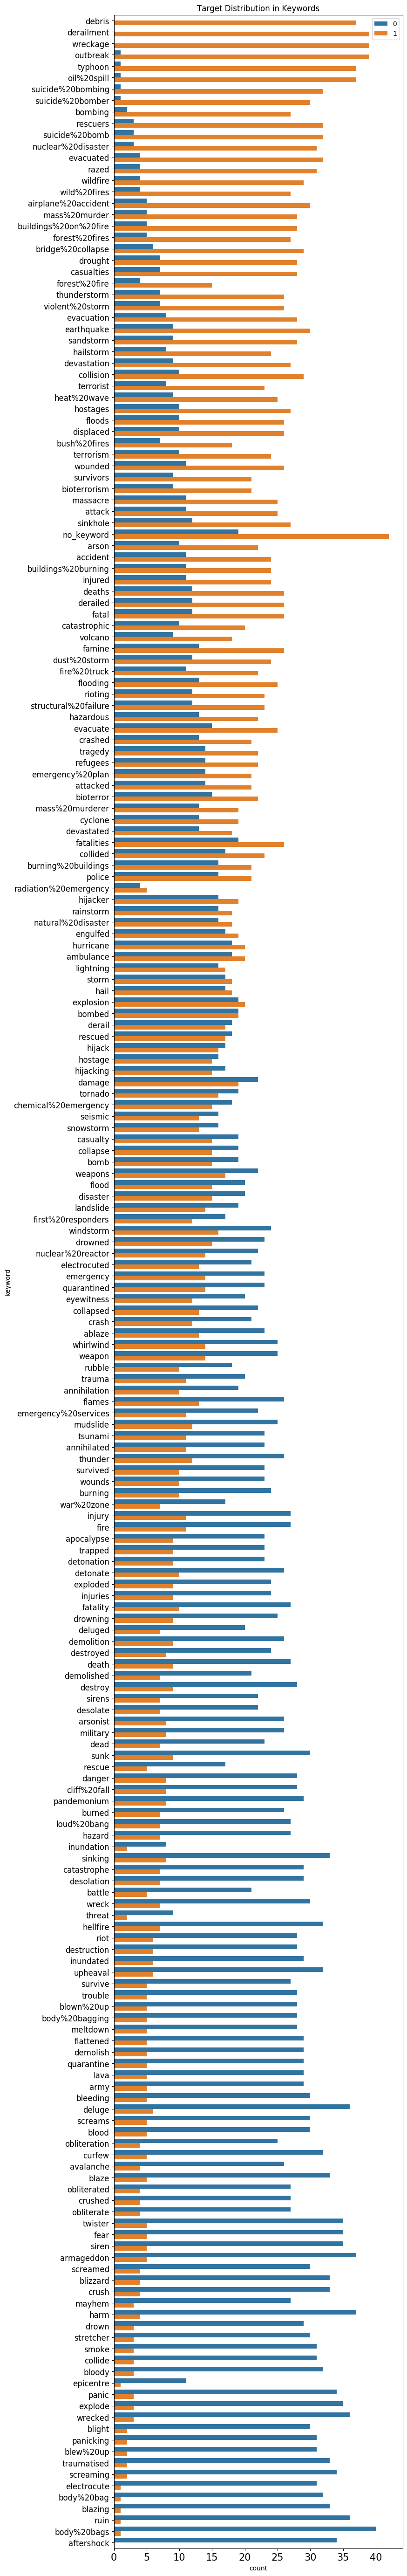

In [19]:
train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

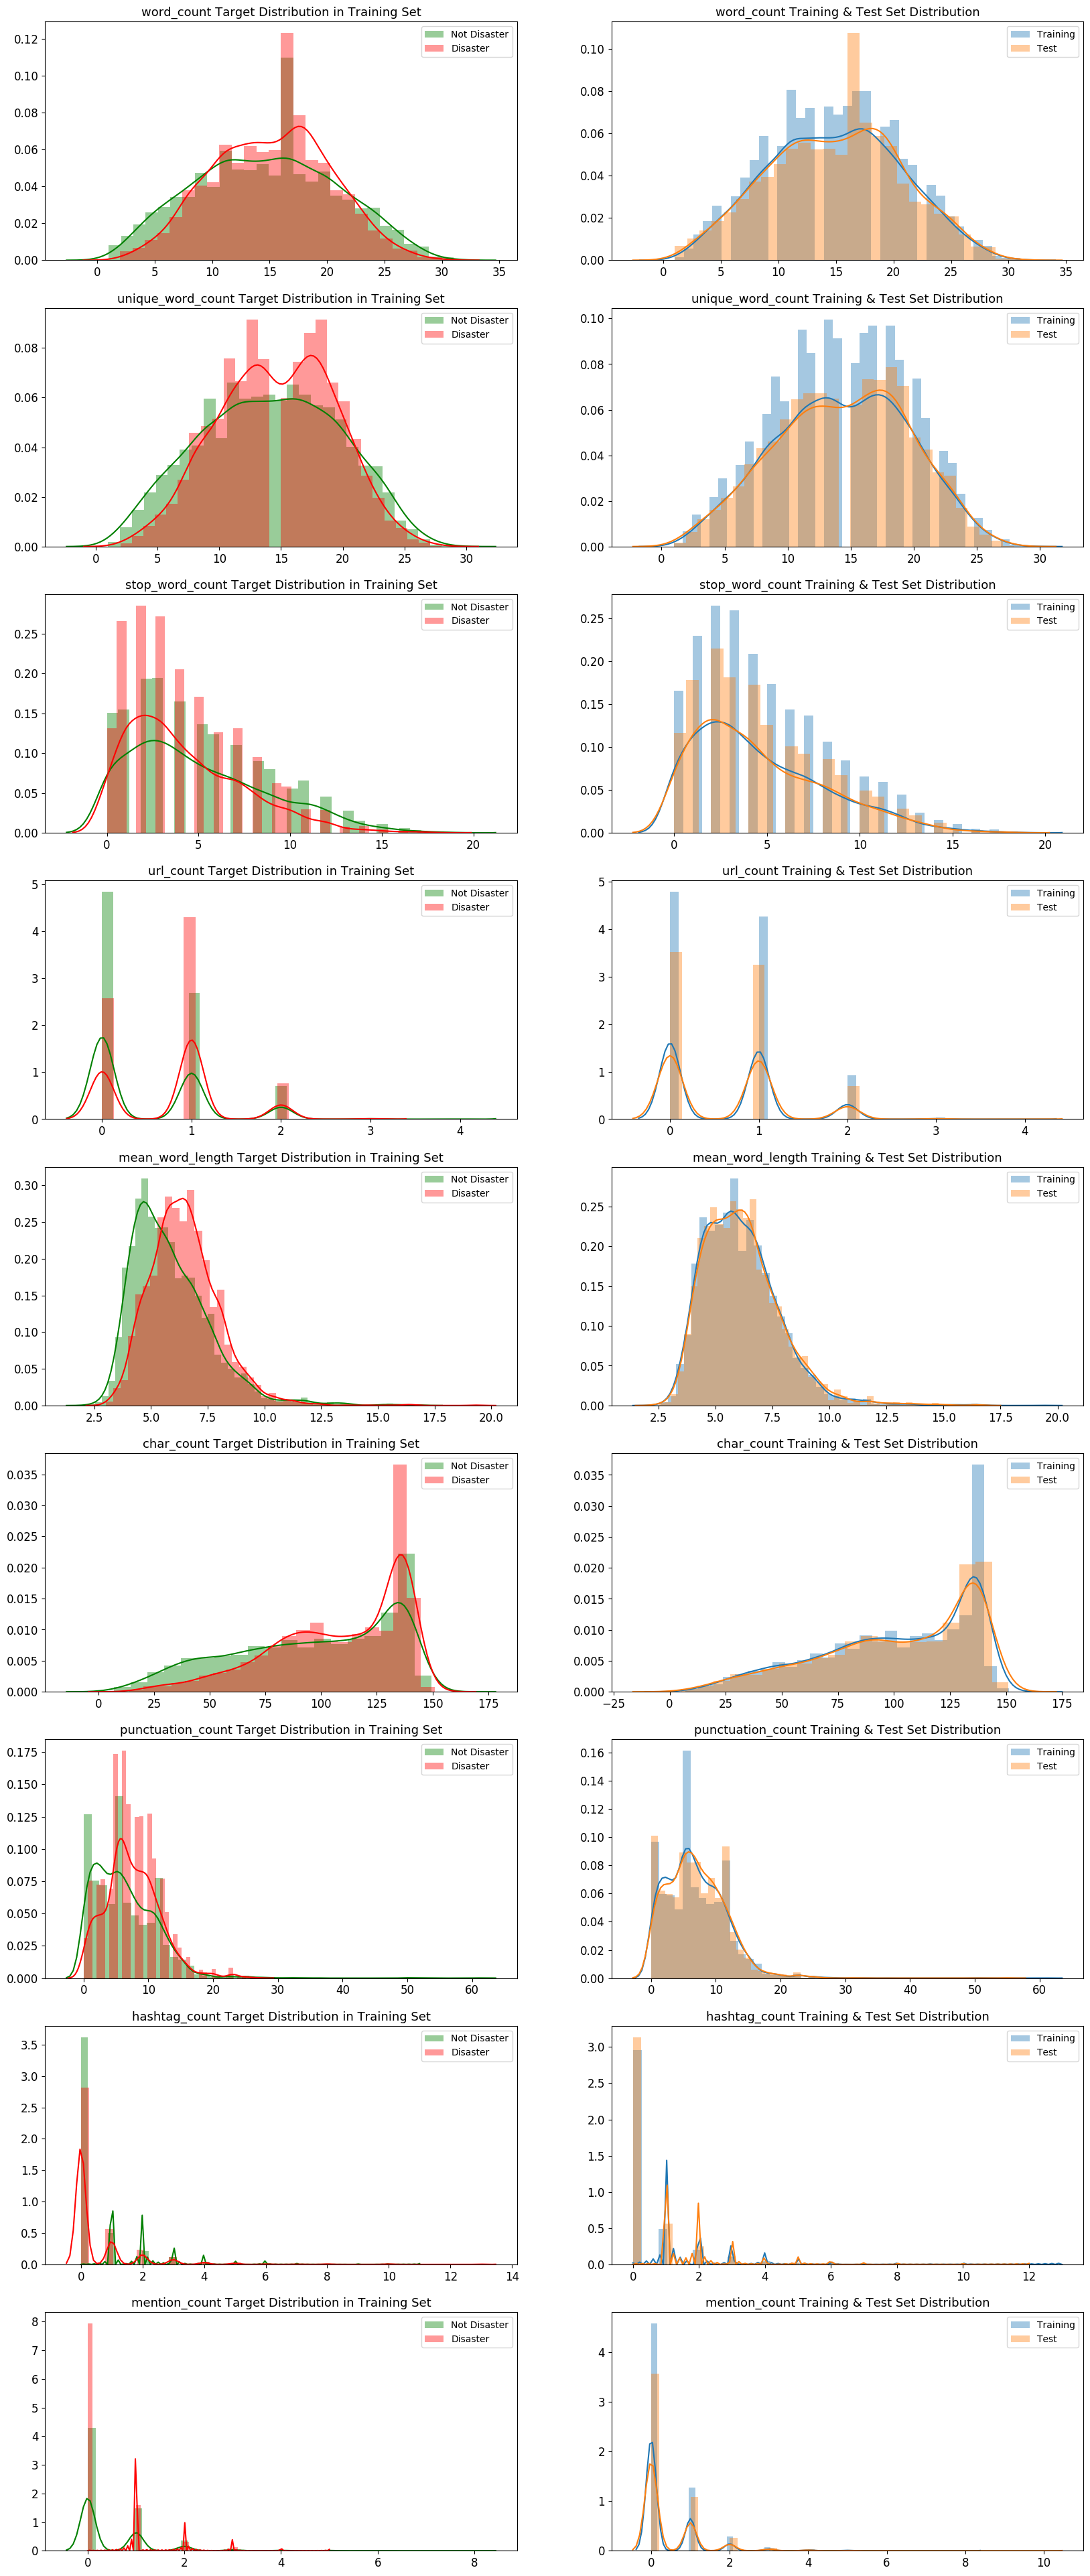

In [21]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train_df['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(train_df.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(train_df.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(train_df[feature], label='Training', ax=axes[i][1])
    sns.distplot(test_df[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

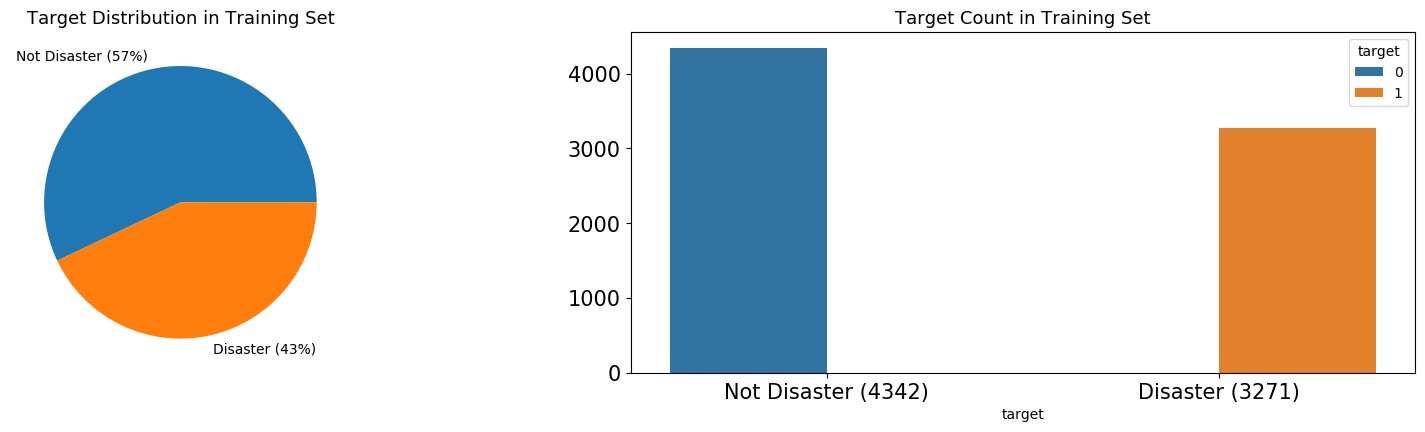

In [22]:

print("TF version:", tf.__version__)fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train_df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=train_df['target'], hue=train_df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

In [34]:
df_leak = pd.read_csv('socialmedia-disaster-tweets-DFE.csv', encoding ='ISO-8859-1')[['choose_one', 'text']]

# Creating target and id
df_leak['target'] = (df_leak['choose_one'] == 'Relevant').astype(np.int8)
df_leak['id'] = df_leak.index.astype(np.int16)
df_leak.drop(columns=['choose_one', 'text'], inplace=True)

# Merging target to test set
test_df = test_df.merge(df_leak, on=['id'], how='left')

print('Leaked Data Set Shape = {}'.format(df_leak.shape))
print('Leaked Data Set Memory Usage = {:.2f} MB'.format(df_leak.memory_usage().sum() / 1024**2))

Leaked Data Set Shape = (10876, 2)
Leaked Data Set Memory Usage = 0.09 MB


In [30]:
submission = pd.read_csv("sample_submission.csv")
submission.head(10)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
5,12,0
6,21,0
7,22,0
8,27,0
9,29,0


In [35]:
ORIGINAL_FEATURES = ['id', 'keyword', 'location', 'text', 'target']

train_df[ORIGINAL_FEATURES].to_pickle('train.pkl')
test_df[ORIGINAL_FEATURES].to_pickle('test.pkl')

submission = pd.read_csv("sample_submission.csv")
submission['target'] = test_df['target'].values
submission.to_csv('submission.csv', index=False)

print('Training Set Shape = {}'.format(train_df[ORIGINAL_FEATURES].shape))
print('Training Set Memory Usage = {:.2f} MB'.format(train_df[ORIGINAL_FEATURES].memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(test_df[ORIGINAL_FEATURES].shape))
print('Test Set Memory Usage = {:.2f} MB'.format(test_df[ORIGINAL_FEATURES].memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 5)
Test Set Memory Usage = 0.13 MB


In [37]:
submission.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [ ]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores
clf.fit(train_vectors, train_df["target"])## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores
clf.fit(train_vectors, train_df["target"])


In [4]:
import pickle
count_vectorizer = feature_extraction.text.CountVectorizer()
clf = linear_model.RidgeClassifier()
pickle.dump(count_vectorizer, open('tranform.pkl', 'wb'))
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [38]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

1.14.0


In [53]:
X_train = train_df["text"]
y_train = train_df["target"]
x_test = test_df['text']
y_val = test_df['target']
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
vocab_size = 10000
embedding_dim = 16
max_length = 30 #Based on data exploration
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [55]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [56]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(padded[0]))


our deeds are the reason of this earthquake may allah forgive us all ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [57]:
print(X_train.values[0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [58]:
len(word_index)

22701

In [ ]:
model = tf.keras.Sequential([
    #Embedding
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #Each sentence will have 120 words
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
    
    #Word embedding with pooling
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    #LSTM
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
    
    #Multi Layer LSTM - Best performing
     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    
    #Glove embedding, Drop out etc
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=4),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(1, activation='sigmoid')
    
    #GRU
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
    
    #ConvD
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid') 
])
#model.compile(optimizer='adam', loss=f1_loss, metrics=['accuracy', f1])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.AUC()])
model.summary()

In [ ]:
num_epochs = 10
history = model.fit(padded, y_train, epochs=num_epochs, validation_data=(testing_padded,  y_val))

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,acc,auc_1,val_loss,val_acc,val_auc_1
0,0.646382,0.620386,0.688290,0.575721,0.729697,0.795952
1,0.479120,0.797977,0.860968,0.471401,0.794361,0.852316
2,0.360173,0.853015,0.919401,0.460243,0.800184,0.859959
3,0.295829,0.882438,0.944995,0.459989,0.805087,0.860335
4,0.249411,0.904111,0.960980,0.473037,0.804168,0.857563


In [64]:
submission1 = pd.read_csv("sample_submission.csv")
submission1["target"] = y_val
submission1.to_csv("submission1.csv", index=False)

In [66]:
submission1.head(10)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [67]:
testing_sequences2 = tokenizer.texts_to_sequences(test_df.text)
testing_padded2 = pad_sequences(testing_sequences2, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [68]:
probabilities = model.predict(testing_padded2)

In [69]:
predictions = (probabilities > 0.5).astype(int)
predictions = np.ndarray.flatten(predictions)
pd.value_counts(predictions)

0    2068
1    1195
dtype: int64

In [70]:
original_test_df = pd.read_csv("test.csv")
df = pd.DataFrame({'text' : original_test_df['text'],'cleaned_text' : test_df['text'], 'prediction' : predictions,'probabilities' : np.ndarray.flatten(probabilities)})
df.to_csv("test_df.csv", index=False)

In [71]:
submission2 = pd.read_csv("sample_submission.csv")
submission2["target"] = predictions
submission2.to_csv("submission2.csv", index=False)

In [72]:
submission2.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [2]:
import tensorflow_hub as hub
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [1]:
module_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(module_url)
embeddings = embed(["A long sentence.", "single-word",
                  "http://example.com"])
print(embeddings.shape)  #(3,128)

In [ ]:
X_train_embeddings = embed(train_df.text.values)
X_test_embeddings = embed(test_df.text.values)

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [ ]:
params = {
    'learning_rate': 0.04,
    'n_estimators': 1500,
    'colsample_bytree': 0.4,
    'metric':'auc'
}

In [ ]:
text_clf = LGBMClassifier(**params)

text_clf.fit(X_train_embeddings['outputs'][:5000,:], train_df.target.values[:5000],
             eval_set=[(X_train_embeddings['outputs'][:5000,:], train_df.target.values[:5000]),
                       (X_train_embeddings['outputs'][5000:,:], train_df.target.values[5000:])],
             verbose=200, early_stopping_rounds=20,
            )

In [ ]:
text_clf.fit(X_train_embeddings['outputs'][:5000,:], train_df.target.values[:5000])
Y_pred = text_clf.predict(X_train_embeddings['outputs'][5000:])

In [ ]:
print(metrics.classification_report(train_df.target[5000:], Y_pred, digits=3),) 
print(metrics.confusion_matrix(train_df.target[5000:], Y_pred))

In [ ]:
text_clf.fit(X_train_embeddings['outputs'], train_df.target.values)
pred_test = text_clf.predict(X_test_embeddings['outputs'])


df = pd.DataFrame({'cleaned_text' : test_df['text'], 'prediction' : pred_test})
df.head(20)

In [ ]:
sample_submission = pd.read_csv("../sample_submission.csv")
sample_submission["target"] = pred_test
sample_submission.to_csv("submission.csv", index=False)